In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
# Import Dataset
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
# Read the dataset
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.shape

(400, 11)

In [6]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

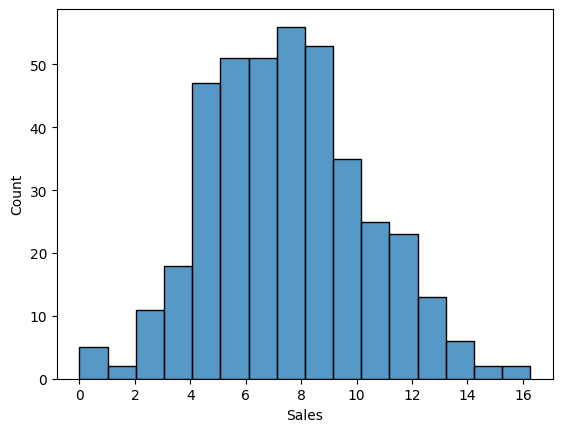

In [7]:
# Representation of Sales data by using histogram
sns.histplot(df['Sales'])
plt.show()

<Figure size 1200x1200 with 0 Axes>

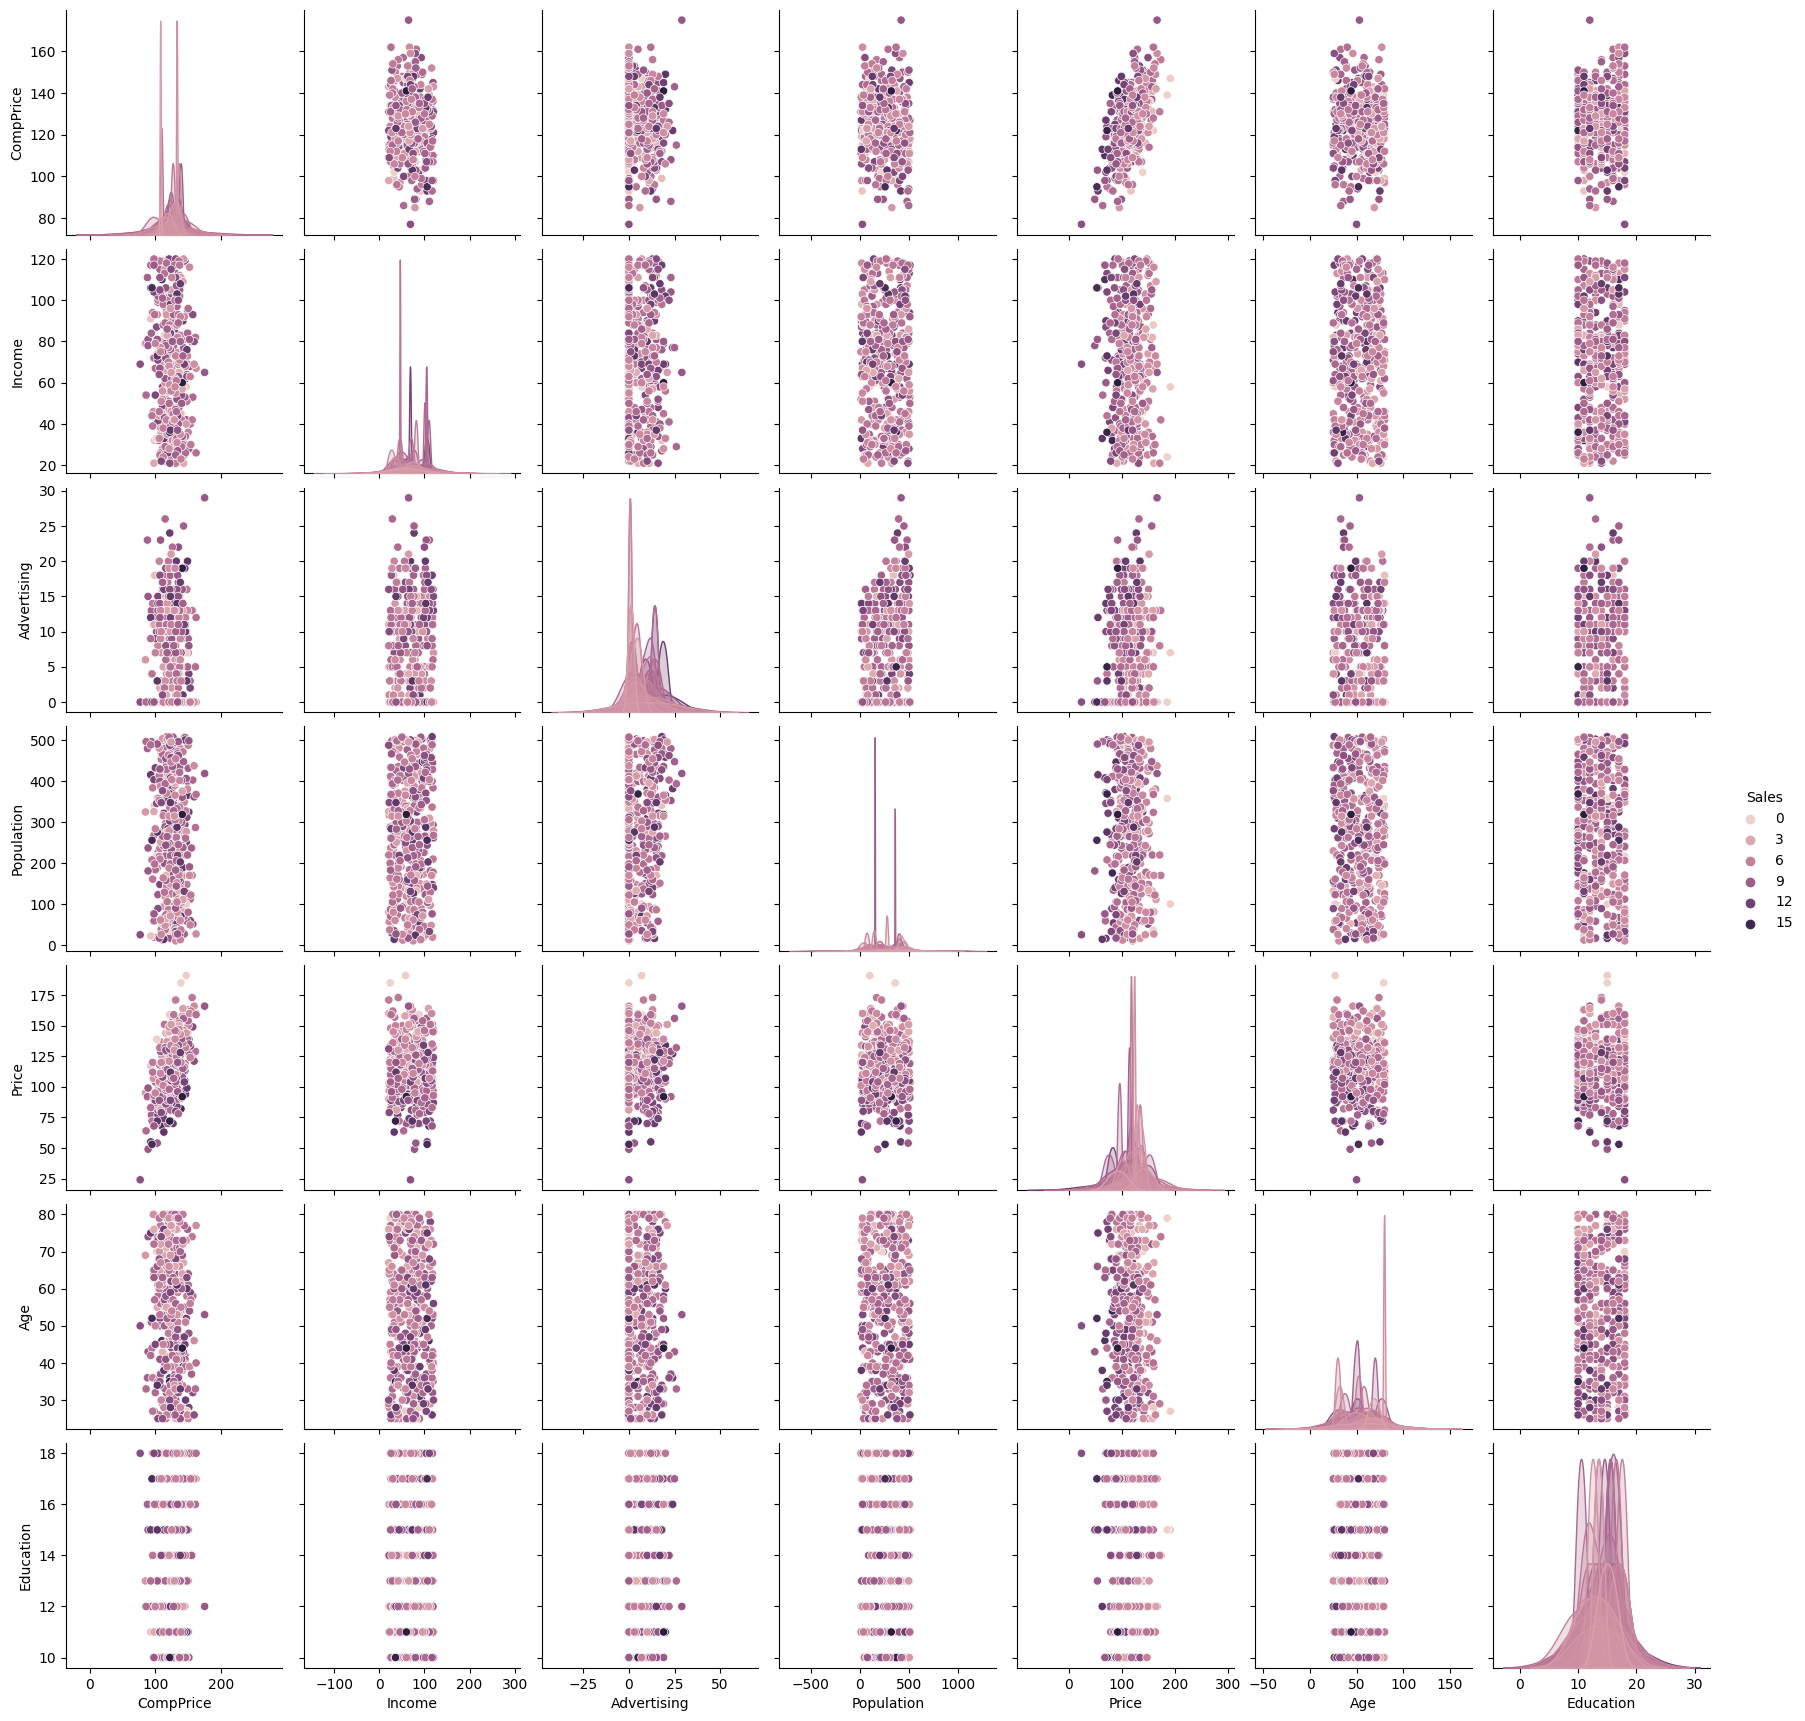

In [8]:
# Let's plot pair plot to visualise the attributes all at once
plt.figure(figsize=(12,12))
sns.pairplot(data=df, hue = 'Sales')

In [9]:
# Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [10]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [11]:
# Describing the target variable
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [12]:
# Converting Numerical to Categorical for target variable
sales=[]
for row in df['Sales']:
    if row<8 : sales.append('Bad')
    elif row>=8 : sales.append('Good')

In [13]:
sales

['Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad

In [14]:
df['sales_label']=sales

In [15]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales_label
0,9.50,138,73,11,276,120,Bad,42,17,1,1,Good
1,11.22,111,48,16,260,83,Good,65,10,1,1,Good
2,10.06,113,35,10,269,80,Medium,59,12,1,1,Good
3,7.40,117,100,4,466,97,Medium,55,14,1,1,Bad
4,4.15,141,64,3,340,128,Bad,38,13,1,0,Bad


<Axes: >

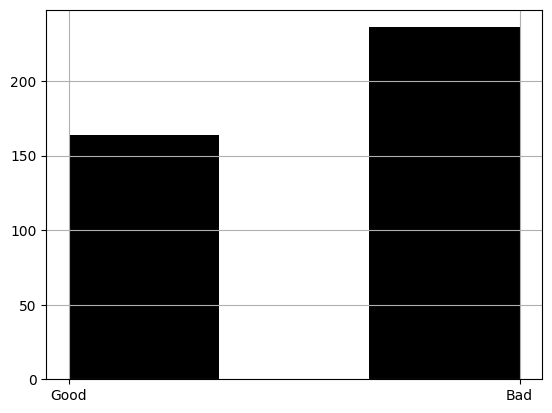

In [16]:
df['sales_label'].value_counts()
df['sales_label'].hist(bins=3, color='black')

In [17]:
# Dropping Numeric Sales Columns from dataframe
df1=df.drop(columns='Sales')

In [18]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales_label
0,138,73,11,276,120,Bad,42,17,1,1,Good
1,111,48,16,260,83,Good,65,10,1,1,Good
2,113,35,10,269,80,Medium,59,12,1,1,Good
3,117,100,4,466,97,Medium,55,14,1,1,Bad
4,141,64,3,340,128,Bad,38,13,1,0,Bad


**<h1>Converting Categorical Variables to Numerical variables</h1>**

In [19]:
cols=['sales_label','ShelveLoc', 'Urban_Yes','US_Yes']

In [20]:
from sklearn.preprocessing import LabelEncoder
df1[cols]=df1[cols].apply(LabelEncoder().fit_transform)
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales_label
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [21]:
x=df1.iloc[:,0:10]
y=df1['sales_label']

In [22]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [23]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: sales_label, Length: 400, dtype: int64

In [24]:
df1['sales_label'].unique()

array([1, 0])

In [25]:
df1.sales_label.value_counts()

0    236
1    164
Name: sales_label, dtype: int64

In [26]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes',
 'sales_label']

In [27]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size= 0.2, random_state=40)

**<h1>Building Decision Tree Classifier using Entropy Criteria</h1>**

In [28]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
from sklearn import tree

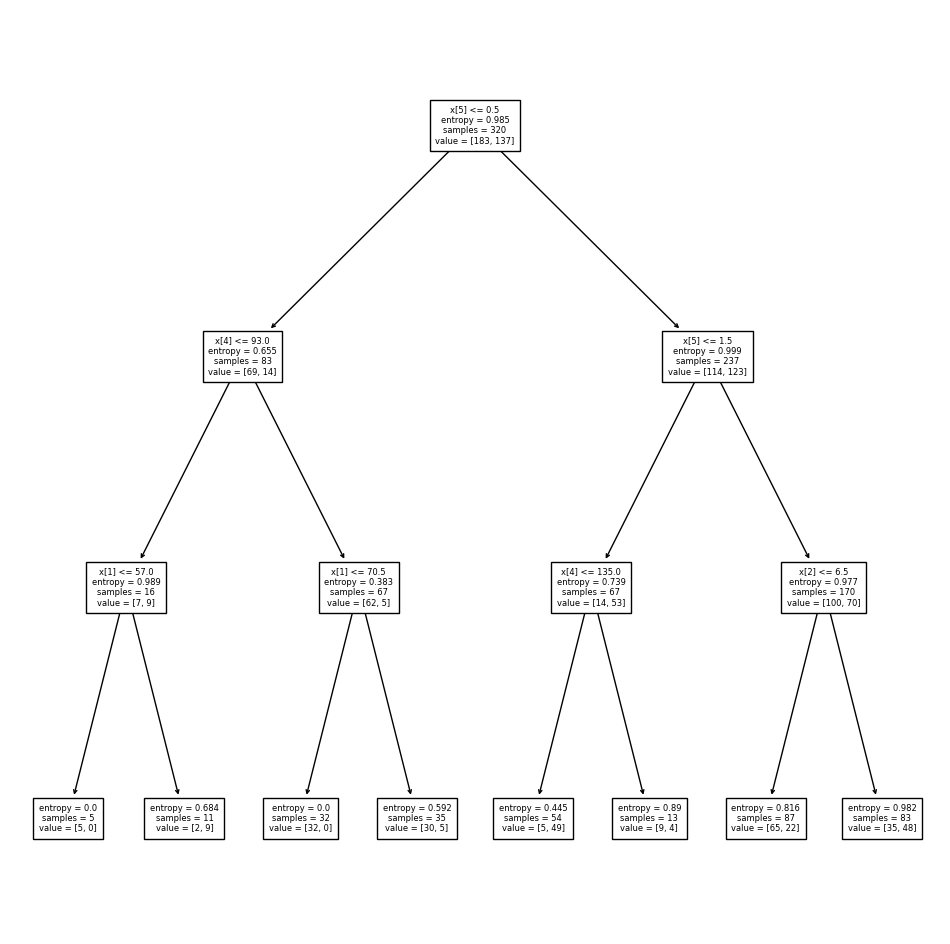

In [30]:
# Plot the decision tree
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

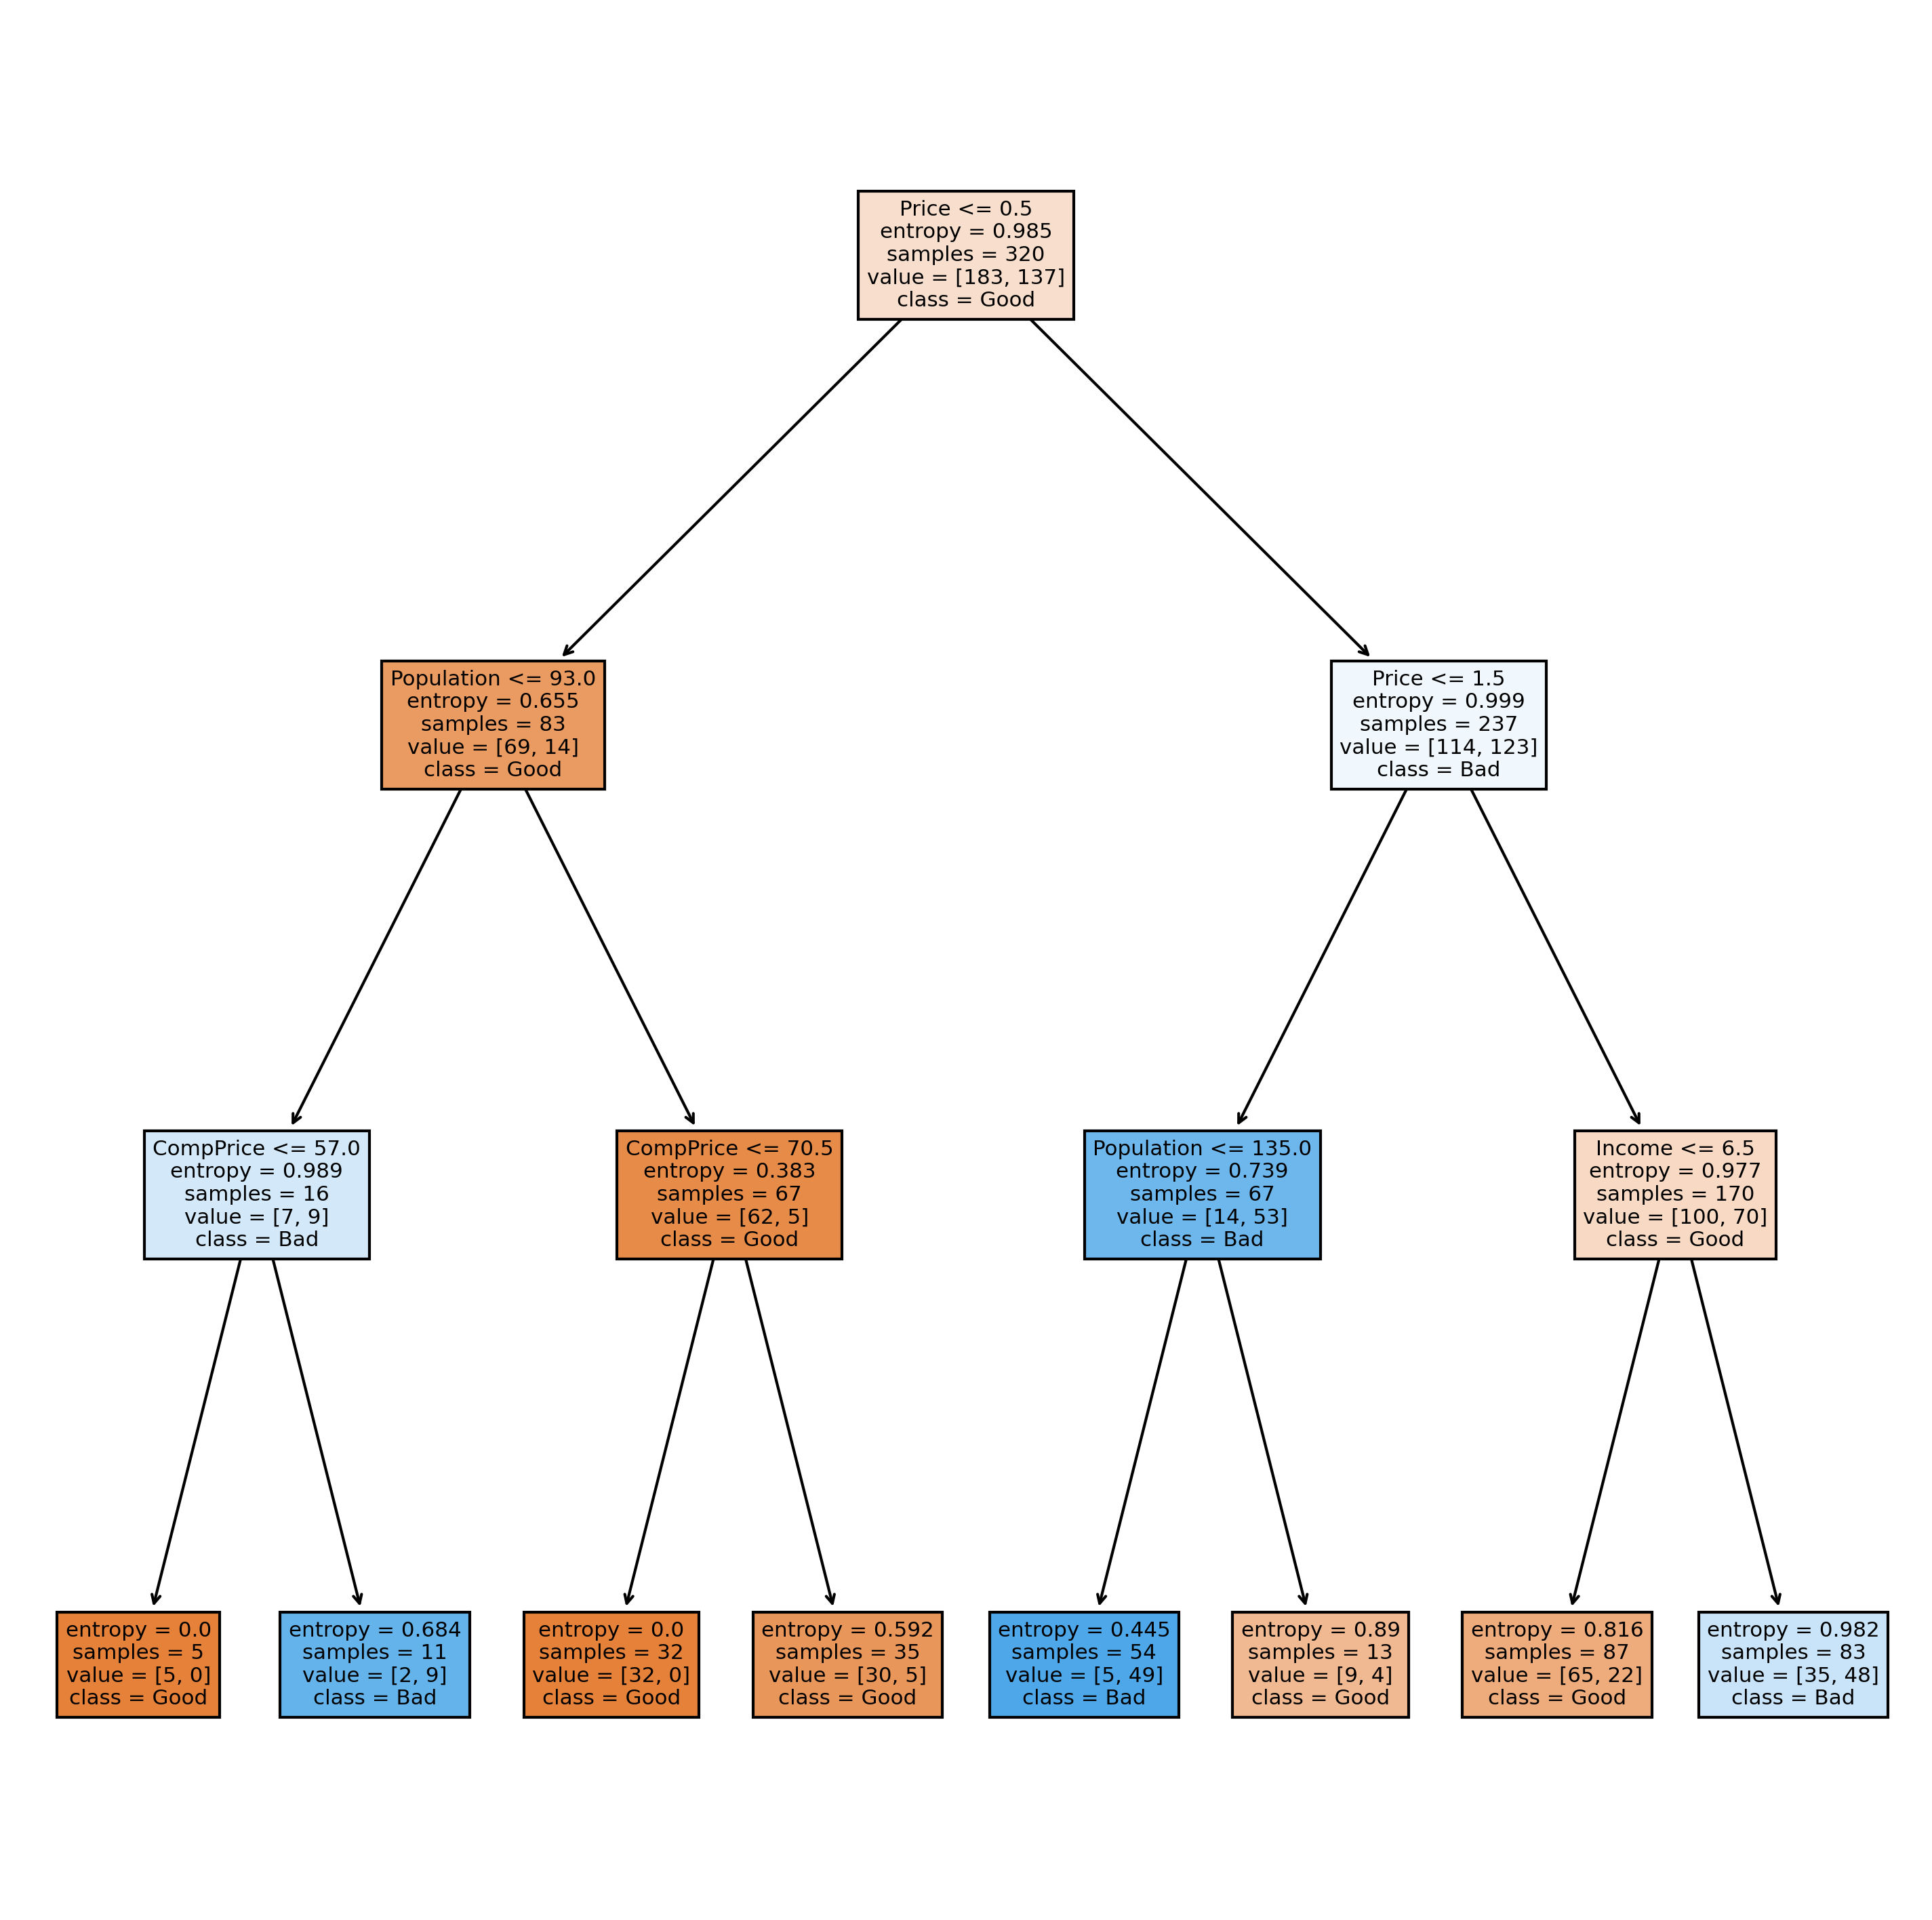

In [31]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['Good','Bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [32]:
# Predicting on test data
preds = model.predict(x_test) # Predicting on test data set
pd.Series(preds).value_counts() # Getting the count of each category

0    49
1    31
dtype: int64

In [33]:
preds

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [34]:
pd.crosstab(y_test,preds) # Getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
sales_label,,
0,39,14
1,10,17


In [35]:
# Accuracy
np.mean(preds==y_test)

0.7

**<h1>Building Decision Tree Classifier (CART) using Gini Criteria</h1>**

In [36]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [37]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

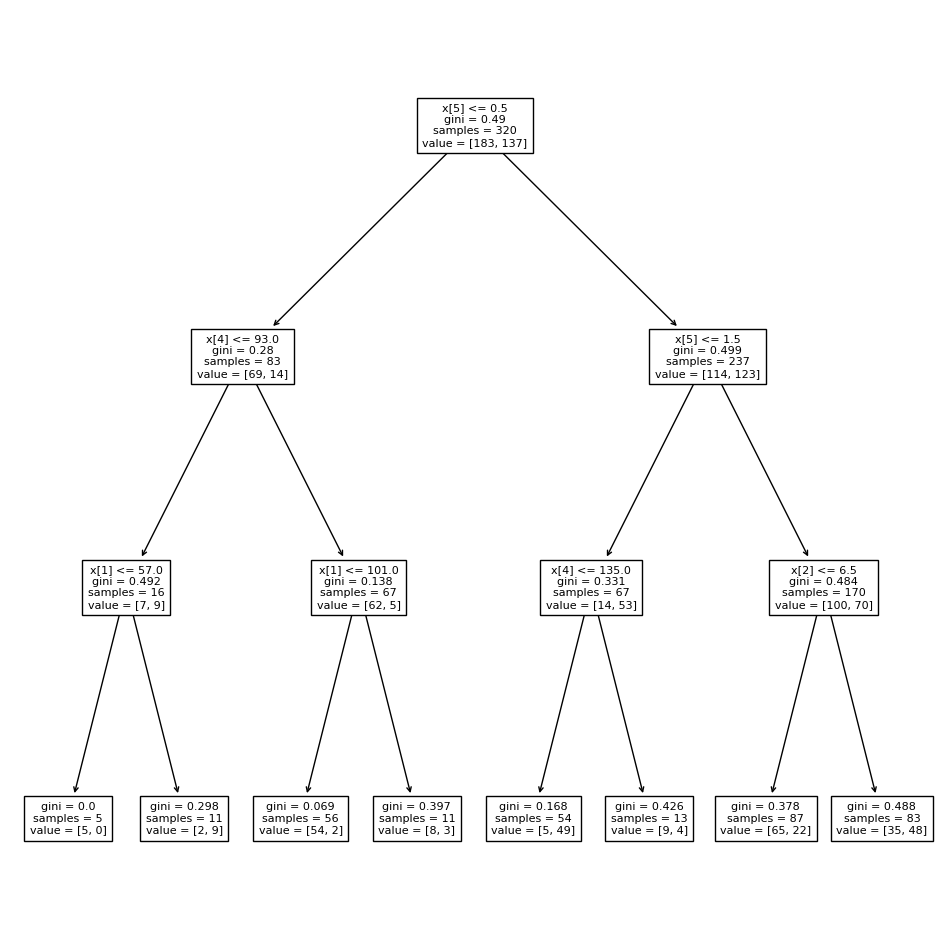

In [38]:
# Plotting Tree Model
plt.figure(figsize=(12,12))
tree.plot_tree(model_gini, fontsize= 8)
plt.show()

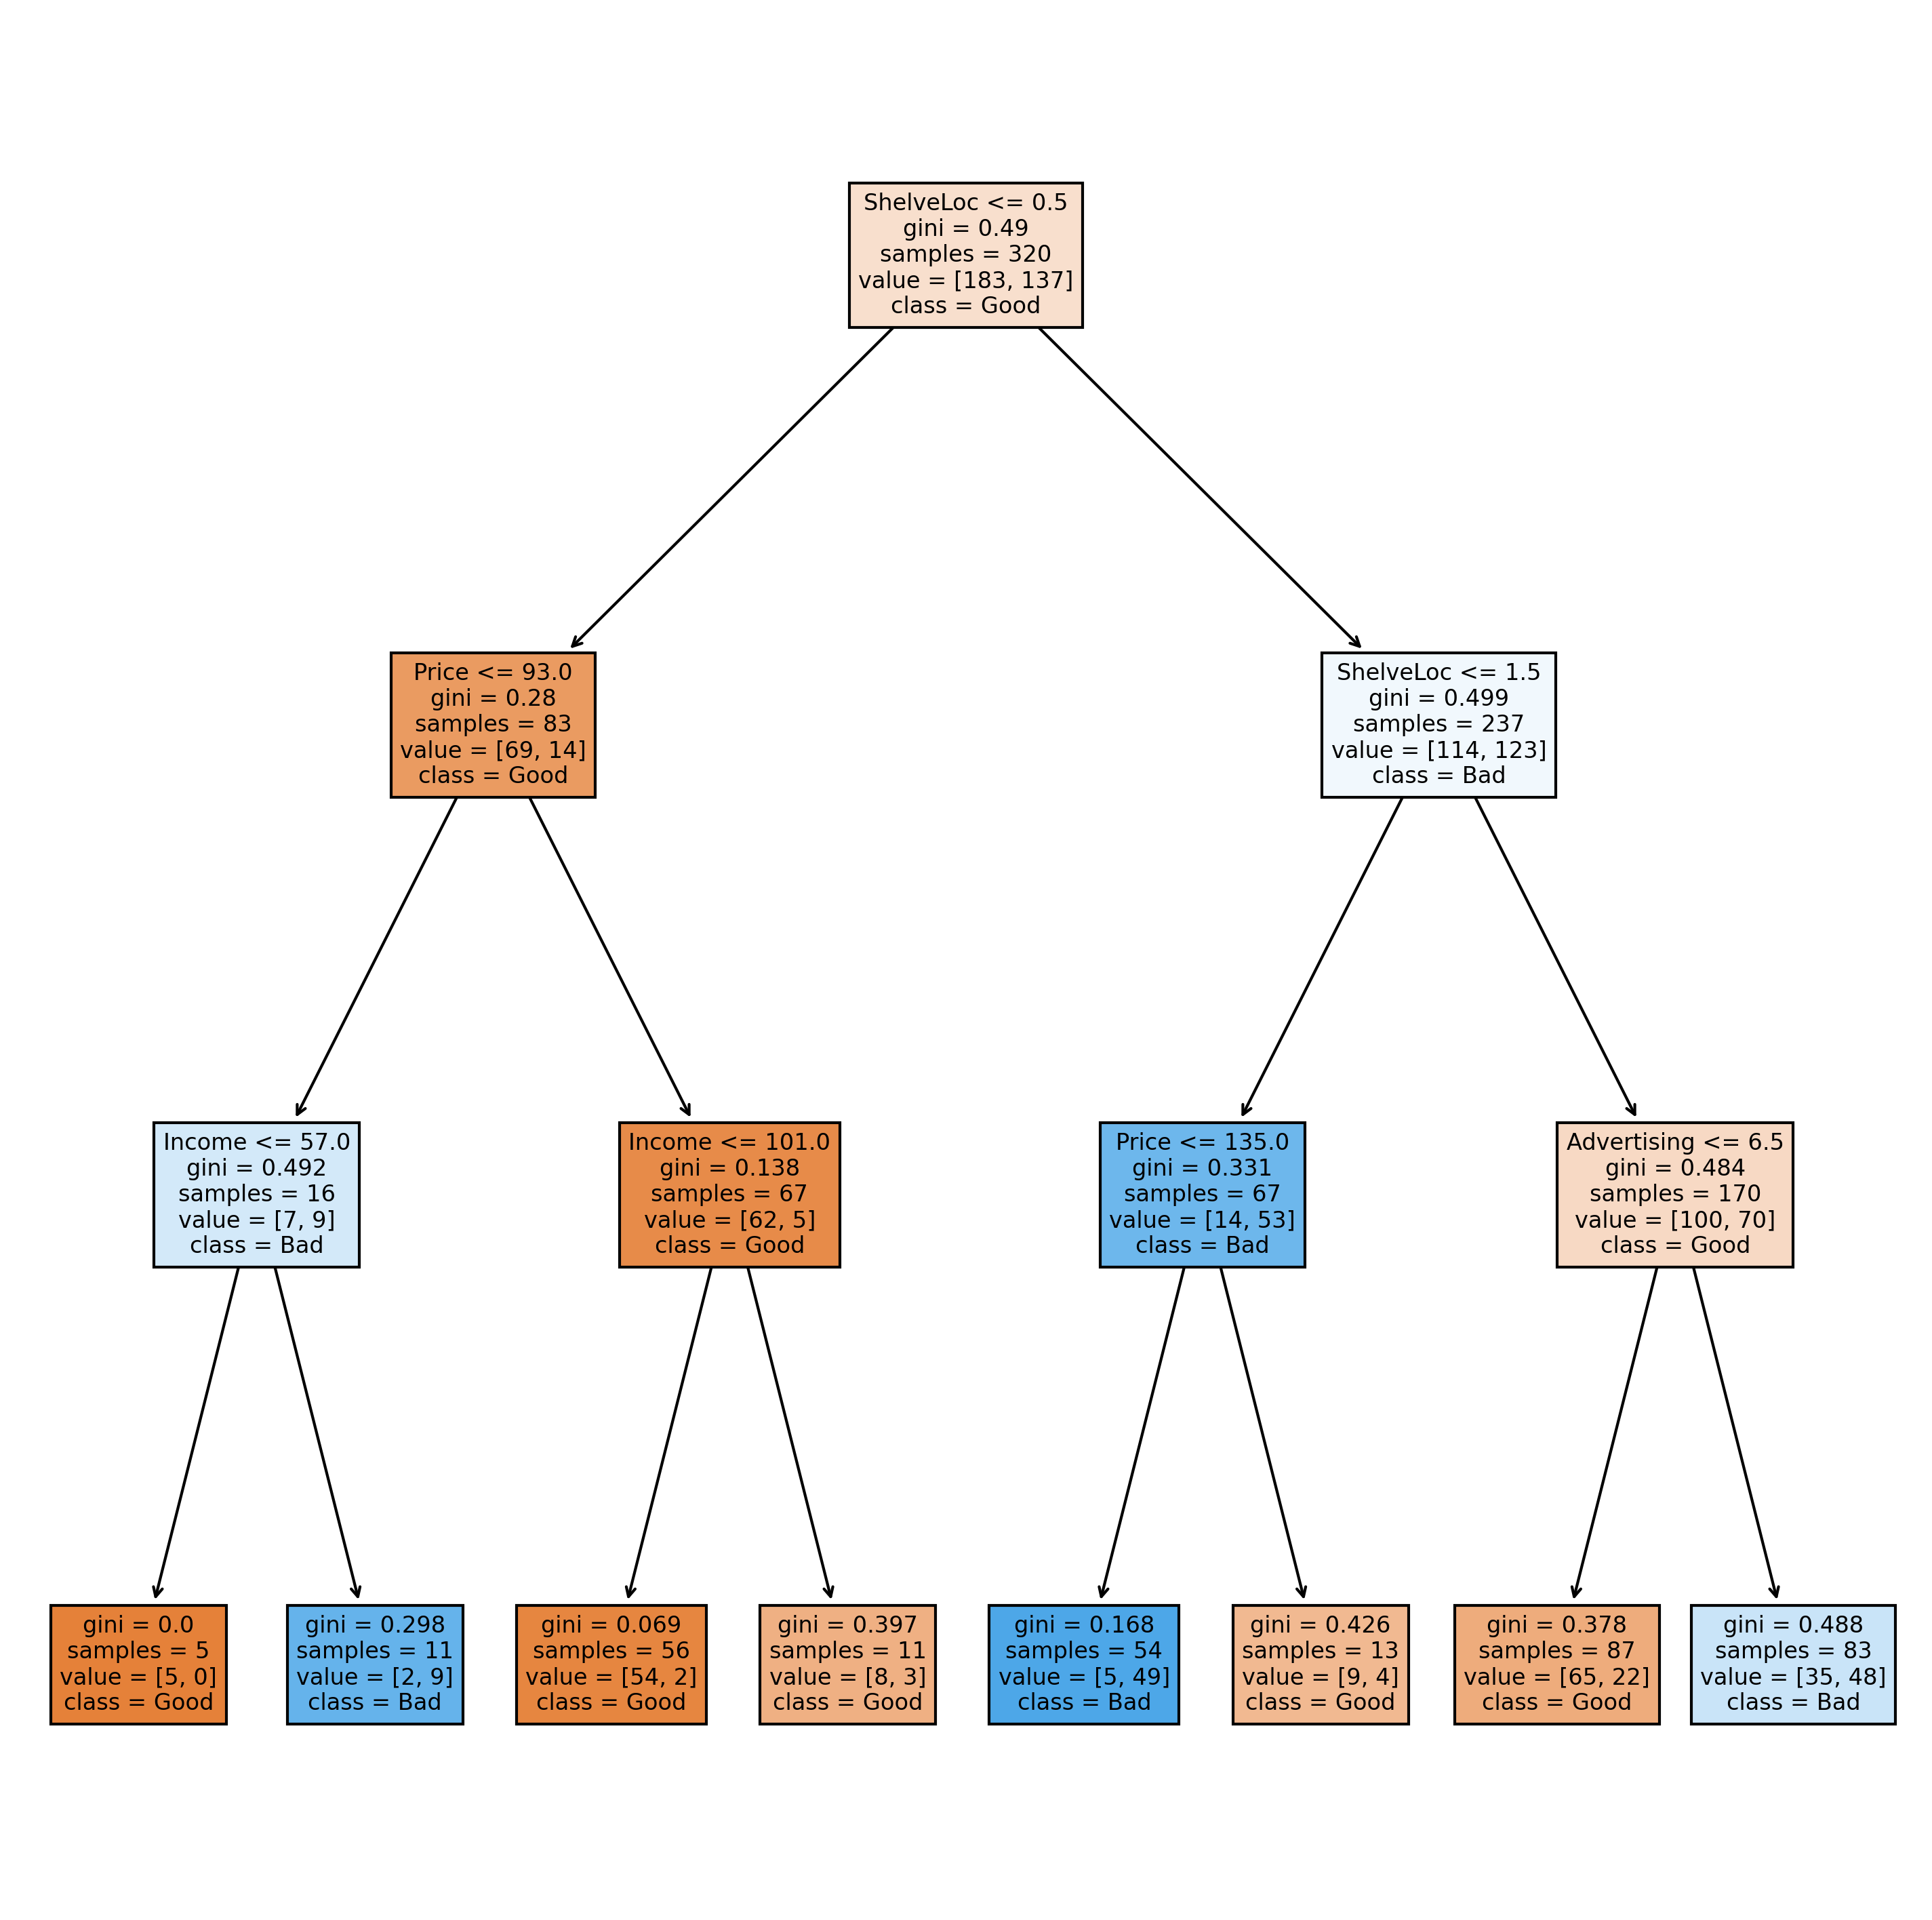

In [39]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']
cn=['Good','Bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [40]:
# Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7

**<h1>Building a Tree Model</h1>**

In [41]:
df1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes', 'sales_label'],
      dtype='object')

|--- Price <= 92.50
|   |--- ShelveLoc <= 0.50
|   |   |--- Income <= 58.00
|   |   |   |--- class: 0
|   |   |--- Income >  58.00
|   |   |   |--- class: 1
|   |--- ShelveLoc >  0.50
|   |   |--- Population <= 198.50
|   |   |   |--- class: 1
|   |   |--- Population >  198.50
|   |   |   |--- class: 1
|--- Price >  92.50
|   |--- Advertising <= 6.50
|   |   |--- CompPrice <= 144.50
|   |   |   |--- class: 0
|   |   |--- CompPrice >  144.50
|   |   |   |--- class: 1
|   |--- Advertising >  6.50
|   |   |--- ShelveLoc <= 0.50
|   |   |   |--- class: 0
|   |   |--- ShelveLoc >  0.50
|   |   |   |--- class: 1



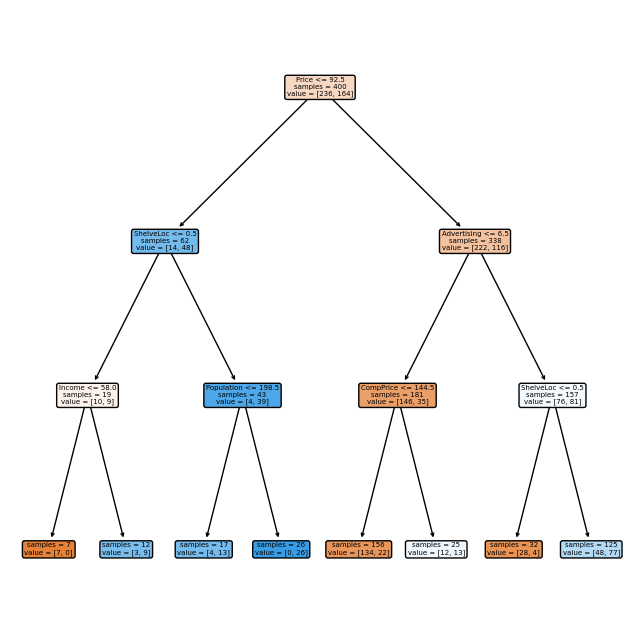

In [42]:
# Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=3)
DTree.fit(x,y)

##Plotting the trees
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(8,8))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes'])
print(export_text(DTree, feature_names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']))


In [43]:
# Tree Model Score
DTree.score(x,y)

0.7675

**<h1>Tree Validation</h1>**

In [44]:
# Tree Validation
predict1 = DTree.predict(x)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y, predict1)
print (cm)

total = sum(sum(cm))
### From confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[169  67]
 [ 26 138]]
0.7675


**<h1>Pruning the Model</h1>**

In [45]:
# Training Tree Model
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 8, max_depth=3)
clf.fit(x_train,y_train)

predict1 = clf.predict(x_train)
predict2 = clf.predict(x_test)

# On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

# On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 0.771875
Test Accuracy 0.7


**Conclusion :**
We have got the Training model accuracy as 77.2% and Testing Accuracy as 70%